<a href="https://colab.research.google.com/github/mayuri320/-Covid-stock-market-analysis-using-TDA/blob/main/Insaid_Internship_Task_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internship Task
**`Busniness Context`**:

This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the  case is available in .csv format having 6362620 rows and 10 columns.
Candidates can use whatever method they wish to develop their machine learning model. Following usual model development procedures, the model would be estimated on the  calibration data and tested on the validation data. This case requires both statistical analysis and  creativity/judgment. We recommend you spend time on both fine tuning and interpreting the results of your machine learning model.

**`Data Dictionary`**:

1. **step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
2. **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
3. **amount** - amount of the transaction in local currency.
4. **nameOrig** - customer who started the transaction.
5. **oldbalanceOrg** - initial balance before the transaction.
6. **newbalanceOrig** - new balance after the transaction.
7. **nameDest** - customer who is the recipient of the transaction.
8. **oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
9. **newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
10. **isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
11. **isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## Importing libraries

In [ ]:
# for dealing with dataframes
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('display.max_colwidth',100)

# for visualization
import plotly.express as px

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

# for mathematical operations
import numpy as np

# for ml in pycaret
from pycaret.classification import *

## Reading data set

In [ ]:
data=pd.read_csv('Fraud.csv')

## Taking a look through dataset




In [ ]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,6362620.0,NaN,NaN,NaN,243.397246,142.331971,1.0,156.0,239.0,335.0,743.0
type,6362620,5,CASH_OUT,2237500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,6362620.0,NaN,NaN,NaN,179861.903549,603858.231463,0.0,13389.57,74871.94,208721.4775,92445516.64
nameOrig,6362620,6353307,C1832548028,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,6362620.0,NaN,NaN,NaN,833883.104074,2888242.673007,0.0,0.0,14208.0,107315.175,59585040.37
newbalanceOrig,6362620.0,NaN,NaN,NaN,855113.668579,2924048.502971,0.0,0.0,0.0,144258.41,49585040.37
nameDest,6362620,2722362,C1286084959,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,6362620.0,NaN,NaN,NaN,1100701.66652,3399180.112969,0.0,0.0,132705.665,943036.7075,356015889.35
newbalanceDest,6362620.0,NaN,NaN,NaN,1224996.398202,3674128.942094,0.0,0.0,214661.44,1111909.25,356179278.92
isFraud,6362620.0,NaN,NaN,NaN,0.001291,0.035905,0.0,0.0,0.0,0.0,1.0


In [ ]:
data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [ ]:
data.isnull().sum()/len(data)*100

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

## EDA

**isFraud**

In [ ]:
data['isFraud'].value_counts(normalize=True)*100

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

Target variable is **highly imbalanced**. We will use **recall** as an evaluation metric.

**step** vs **isFraud**

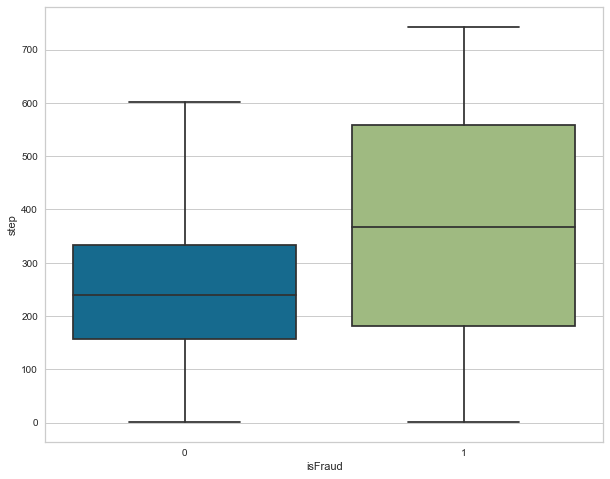

In [ ]:
# without outliers
f,ax=plt.subplots(figsize=(10,8))
g=sns.boxplot(x='isFraud',
              y='step',
              data=data,
              showfliers=False);

**type** vs **isFraud**

In [ ]:
data[['isFraud','type']].value_counts(normalize=True)*100

isFraud  type    
0        CASH_OUT    35.101641
         PAYMENT     33.814608
         CASH_IN     21.992261
         TRANSFER     8.311230
         DEBIT        0.651178
1        CASH_OUT     0.064690
         TRANSFER     0.064392
dtype: float64

**amount** vs **isFraud**

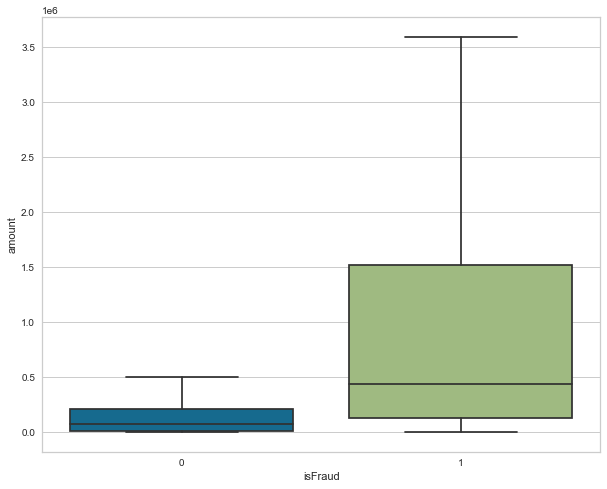

In [ ]:
# without outliers
f,ax=plt.subplots(figsize=(10,8))
g=sns.boxplot(x='isFraud',
              y='amount',
              data=data,
              showfliers=False);

**oldbalanceOrg** vs **isFraud**

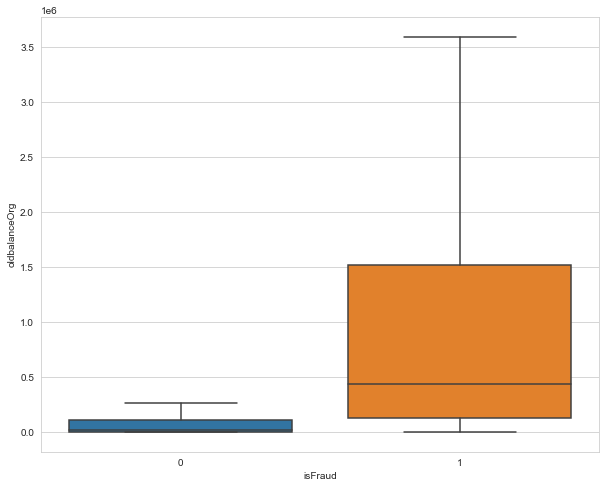

In [ ]:
# without outliers
f,ax=plt.subplots(figsize=(10,8))
g=sns.boxplot(x='isFraud',
              y='oldbalanceOrg',
              data=data,
              showfliers=False);

**newbalanceOrig** vs **isFraud**

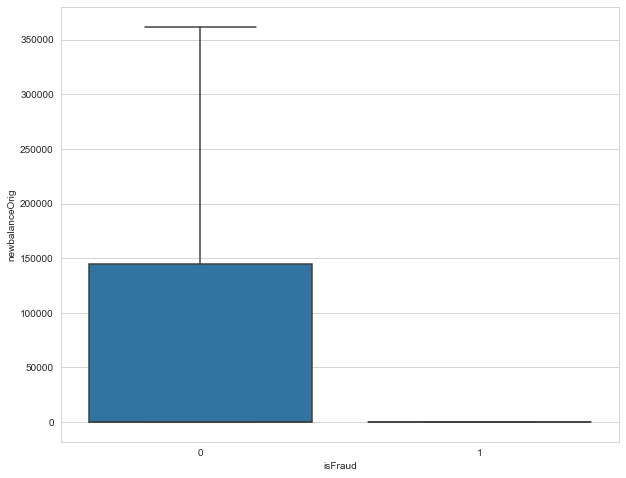

In [ ]:
# without outliers
f,ax=plt.subplots(figsize=(10,8))
g=sns.boxplot(x='isFraud',
              y='newbalanceOrig',
              data=data,
              showfliers=False);

**oldbalanceDest** vs **isFraud**

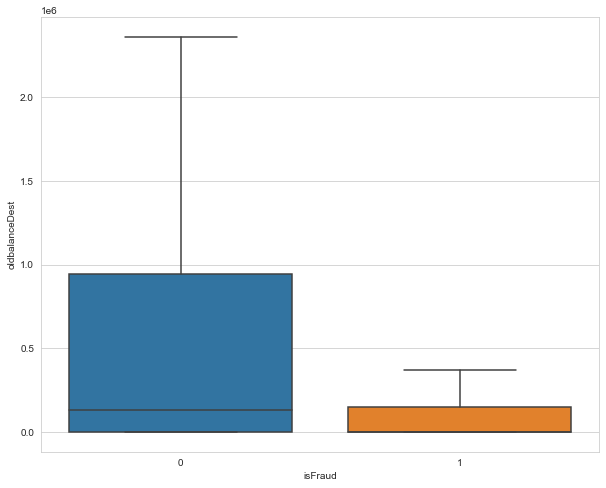

In [ ]:
# without outliers
f,ax=plt.subplots(figsize=(10,8))
g=sns.boxplot(x='isFraud',
              y='oldbalanceDest',
              data=data,
              showfliers=False);

**newbalanceDest** vs **isFraud**

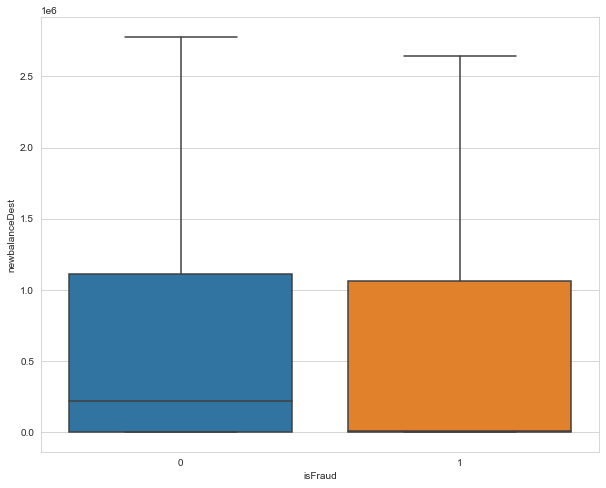

In [ ]:
# without outliers
f,ax=plt.subplots(figsize=(10,8))
g=sns.boxplot(x='isFraud',
              y='newbalanceDest',
              data=data,
              showfliers=False);

**isFlaggedFraud** vs **isFraud**

In [ ]:
data[['isFraud','isFlaggedFraud']].value_counts(normalize=True)*100

isFraud  isFlaggedFraud
0        0                 99.870918
1        0                  0.128831
         1                  0.000251
dtype: float64

**Corelation Plot**

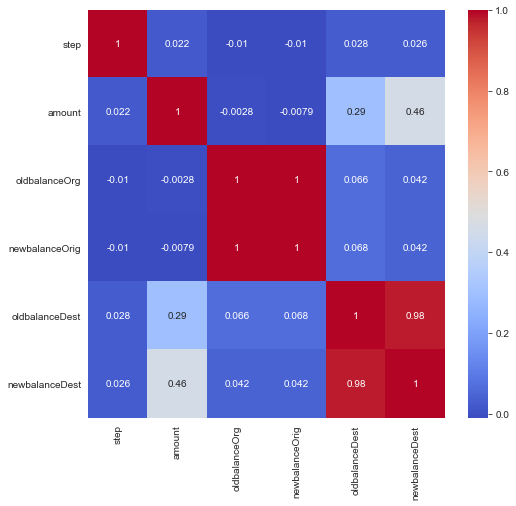

In [ ]:
data_corr=data.drop(columns=['type','isFraud','isFlaggedFraud'])

f,ax=plt.subplots(figsize=(8,7.5))
sns.heatmap(data_corr.corr(),
            cmap='coolwarm',
            annot=True);

We can see a multicolinearity between some variables, we will drop or create some new variables from them.

## Feature Engineering

In [ ]:
data['balanceOrgDiff']=data['newbalanceOrig'] - data['oldbalanceOrg']
data['balanceDestDiff']=data['newbalanceDest'] - data['oldbalanceDest']

In [ ]:
data=data.drop(columns=['newbalanceOrig','oldbalanceOrg',
                        'newbalanceDest','oldbalanceDest'])

**balanceOrgDiff** vs **isFraud**

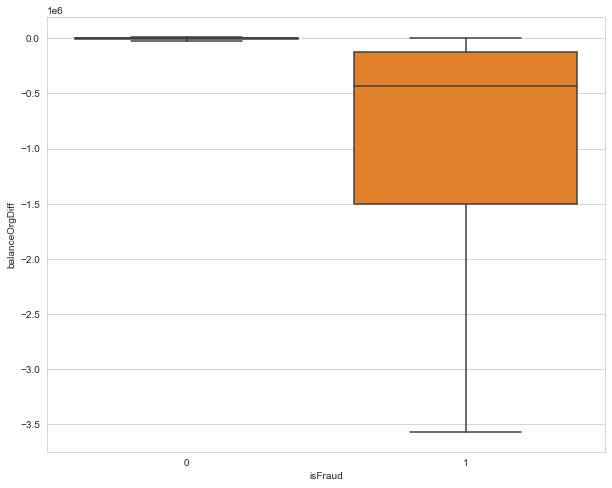

In [ ]:
# without outliers
f,ax=plt.subplots(figsize=(10,8))
g=sns.boxplot(x='isFraud',
              y='balanceOrgDiff',
              data=data,
              showfliers=False);

**balanceDestDiff** vs **isFraud**

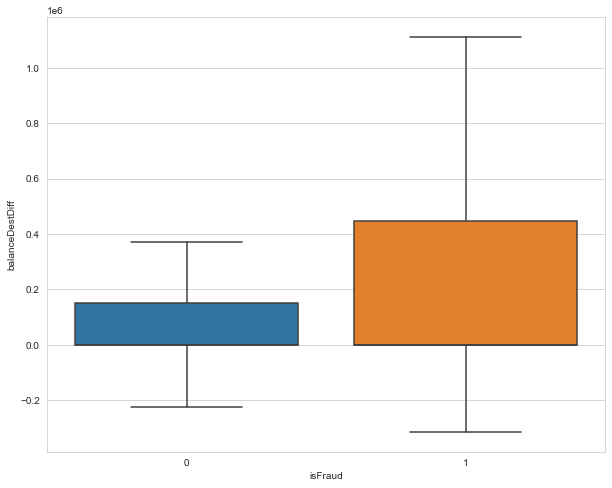

In [ ]:
# without outliers
f,ax=plt.subplots(figsize=(10,8))
g=sns.boxplot(x='isFraud',
              y='balanceDestDiff',
              data=data,
              showfliers=False);

In [ ]:
data.shape

(6362620, 9)

## PyCaret
- Target variable is isFraud and after EDA we got to know that type of the transaction plays the important role in Fraud most of the Fraud transactions are done though CASH_OUT and TRANSFER.
- Normalization is done by using MinMax algorithm.

In [ ]:
# preprocessing
preprocessing_parameters=setup(data,
                               target='isFraud',
                               ignore_features=['nameOrig','nameDest'],
                               categorical_features=['type','isFlaggedFraud'],
                               data_split_stratify=True,
                               session_id=1212,
                               n_jobs=-1,
                               normalize=True,
                               normalize_method='minmax',
                               fold=5,
                               fix_imbalance=True)

,Description,Value
0,session_id,1212
1,Target,isFraud
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(6362620, 9)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


 High-performance gradient boosting framework is used here and got the recall 0.973 .

In [ ]:
# comparing models
best_model=compare_models(include=['lightgbm'],
                          round=3,
                          sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.973,0.997,0.973,0.045,0.085,0.083,0.205,21.364


In [ ]:
# hyperparameter tuning
tuned_best_model=tune_model(best_model,
                            round=3,
                            n_iter=2,
                            optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.966,0.996,0.976,0.036,0.070,0.067,0.184
1,0.965,0.996,0.977,0.035,0.067,0.065,0.181
2,0.965,0.996,0.967,0.035,0.067,0.065,0.180
3,0.965,0.996,0.970,0.035,0.067,0.064,0.180
4,0.963,0.997,0.979,0.033,0.065,0.062,0.177
Mean,0.965,0.996,0.974,0.035,0.067,0.065,0.180
SD,0.001,0.001,0.005,0.001,0.002,0.002,0.002


In [ ]:
# predicting on validation set
predict_model(tuned_best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9657,0.9968,0.9777,0.0355,0.0686,0.0662,0.1830


,step,amount,balanceOrgDiff,balanceDestDiff,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFlaggedFraud_0,isFraud,Label,Score
0,0.305930,0.000866,0.845932,0.059079,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.5000
1,0.479784,0.001295,0.845023,0.059451,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.5000
2,0.207547,0.000143,0.845932,0.058328,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0.5001
3,0.287062,0.001490,0.857584,0.058190,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.5001
4,0.508086,0.001688,0.845932,0.059792,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908782,0.061995,0.000796,0.852153,0.057637,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.5001
1908783,0.253369,0.000493,0.842077,0.058755,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0.5000
1908784,0.181941,0.000077,0.845333,0.058328,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0.5001
1908785,0.012129,0.000203,0.844346,0.058328,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0.5001


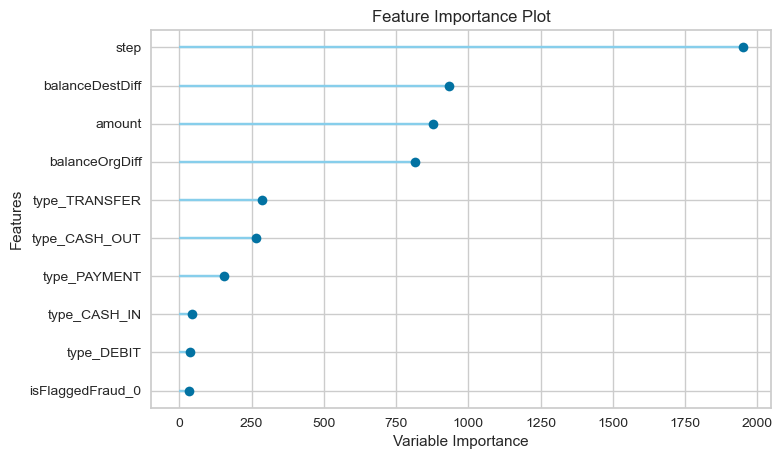

In [ ]:
# feature importance
plot_model(tuned_best_model,plot='feature_all')

- We can see the least important feature is **isFlaggedFraud** and features we
created turns out to be important for regressor model.
- key factors that predict fraudulent customer are if number of steps and the amount of transaction is more so there are more number of chances of fraud.
- At the time CASH_OUT and TRANSFER fraud is happning so have to be carefull that time.
- For prevention we have to carefull and consider that fraud can happen when large amount of transaction is happening from newbalanceDest through perticular type.
- When these actions have been implemented we will able to track the perticular type of transactions if there are some doubts. Using the model we can perdict the fraud transaction and able to give more attention to these type of transactions in future to prevent this.